# DATA PREPROCESSING

In [544]:
#Library Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import csv
import scipy
from datetime import datetime
from io import StringIO


### Data Loading

For this project, only rows from the CSV file with the exact expected number of columns (10) were loaded. This ensures structural consistency and prevents issues from malformed or incomplete rows due to data entry errors or formatting inconsistencies. By filtering out rows with missing or extra columns at the preprocessing stage, the analysis is based on reliable data, reducing the risk of misaligned fields and maintaining data integrity throughout the workflow. This decision supports transparency and reproducibility in the data cleaning process.

**Skipped rows due to column mismatch:**  
- Line 1003: expected 10 fields, saw 11  
- Line 1006: expected 10 fields, saw 12  
- Line 1008: expected 10 fields, saw 11  
- Line 1012: expected 10 fields, saw 11  
- Line 1014: expected 10 fields, saw 13

In [545]:
# Load the CSV file
# Read the CSV, keeping all rows as raw text
input_path = "/Users/patriciajaquez/Documents/GitHub/module1_project/data/raw/marketingcampaigns.csv"
rows = []
expected_columns = 10

with open(input_path, 'r', encoding='utf-8') as infile:
    for line in infile:
        if len(line.strip().split(',')) == expected_columns:
            rows.append(line)

# Join the clean rows and load into pandas
clean_data = pd.read_csv(StringIO(''.join(rows)))

# Check the shape of the DataFrame
print("Shape of the DataFrame:", clean_data.shape)

Shape of the DataFrame: (1032, 10)


In [546]:
# Display the first few rows of the DataFrame
#This prints the first 5 rows
clean_data.head()


,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
0,Public-key multi-tasking throughput,2023-04-01,2024-02-23,8082.3,0.35,email,B2B,organic,0.40,709593.48
1,De-engineered analyzing task-force,2023-02-15,2024-04-22,17712.98,0.74,email,B2C,promotion,0.66,516609.10
2,Balanced solution-oriented Local Area Network,2022-12-20,2023-10-11,84643.1,0.37,podcast,B2B,paid,0.28,458227.42
3,Distributed real-time methodology,2022-09-26,2023-09-27,14589.75,0.47,webinar,B2B,organic,0.19,89958.73
4,Front-line executive infrastructure,2023-07-07,2024-05-15,39291.9,0.30,social media,B2B,promotion,0.81,47511.35


In [547]:
# Display the last few rows of the DataFrame
#This prints the last 5 rows
clean_data.tail()

,campaign_name,start_date,end_date,budget,roi,type,target_audience,channel,conversion_rate,revenue
1027,No revenue campaign,2023-02-01,2023-08-01,20000,0.3,social media,B2B,organic,0.5,NaN
1028,Random mess,2023-06-06,NaN,100000,NaN,podcast,NaN,referral,NaN,300000.0
1029,Invalid budget,2022-12-01,2023-06-01,abc,NaN,email,B2C,promotion,0.2,50000.0
1030,Overlapping dates,2023-03-01,2022-12-31,60000,0.6,webinar,B2B,paid,0.7,90000.0
1031,Too many conversions,2023-05-01,2023-11-01,40000,0.8,social media,B2C,organic,1.5,120000.0


In [548]:
#Dataframe info, including data types (Dtype) and its total, number of entries and total of columns
clean_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1032 non-null   object 
 1   start_date       1031 non-null   object 
 2   end_date         1030 non-null   object 
 3   budget           1029 non-null   object 
 4   roi              1028 non-null   float64
 5   type             1031 non-null   object 
 6   target_audience  1030 non-null   object 
 7   channel          1031 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1029 non-null   float64
dtypes: float64(3), object(7)
memory usage: 80.8+ KB


In [549]:
#Count of empty values per column
empty_values = clean_data.isnull().sum()
print(empty_values)

print("Total of empty values: ", sum(empty_values))

# Rows with at least one missing value
rows_with_missing = clean_data.isnull().any(axis=1).sum()
print(f"Rows with at least one missing value: {rows_with_missing}")

# Empty rows
empty_rows = clean_data[clean_data.isnull().all(axis=1)]
print(f"Number of empty rows: {empty_rows.shape[0]}")

campaign_name      0
start_date         1
end_date           2
budget             3
roi                4
type               1
target_audience    2
channel            1
conversion_rate    4
revenue            3
dtype: int64
Total of empty values:  21
Rows with at least one missing value: 11
Number of empty rows: 0


In [550]:
# Descriptive statistics and possible outliers
clean_data.describe()


,roi,conversion_rate,revenue
count,1028.000000,1028.000000,1029.000000
mean,0.533804,0.541936,511591.195277
std,0.261869,0.267353,287292.729847
min,-0.200000,0.000000,108.210000
25%,0.310000,0.300000,267820.250000
50%,0.530000,0.550000,518001.770000
75%,0.760000,0.770000,765775.140000
max,0.990000,1.500000,999712.490000


In [551]:
# Review unique values in categorical columns
cat_cols = ['type', 'target_audience', 'channel']
for col in cat_cols:
    print(f"\nUnique values in {col}:")
    print(clean_data[col].unique())


Unique values in type:
['email' 'podcast' 'webinar' 'social media' nan 'event' 'B2B']

Unique values in target_audience:
['B2B' 'B2C' 'social media' nan]

Unique values in channel:
['organic' 'promotion' 'paid' 'referral' nan]


## Data Issues Identified

During data preprocessing, the following data quality issues were found:

1. **Rows with Incorrect Number of Columns**  
    - Some rows in the raw CSV did not match the expected number of columns and were excluded.

2. **Missing Values**  
    - Several columns contained missing values, including `start_date`, `end_date`, `budget`, `roi`, `type`, `target_audience`, `channel`, `conversion_rate`, and `revenue`.

3. **Invalid (Non-numeric) Values in Numeric Columns**  
    - Non-numeric values were present in columns expected to be numeric, such as `budget`, `conversion_rate`, `revenue`, and `roi`.

4. **Incorrect Column Data Type**  
    - Columns like `budget` is expected to be float instead of object.

5. **Empty Values**  
    - Empty values were found in all columns except `campaign_name`.

6. **Unexpected Categorical Values**  
    - The `type` and `target_audience` columns contained values outside the expected categories or possible misplacements.

7. **Outliers**  
    - Outliers were present in numeric columns, especially in `conversion_rate` (values > 100%) and `revenue` (values much higher than average).


## Handling Errors

### Percentage of missing values
This information is crucial for determining how to handle missing data—columns with a high percentage of missing values may require different treatment than those with only a few missing entries.

In [552]:
#Percentage of empty values per column
empty_values_percentage = (empty_values / len(clean_data)) * 100
print(empty_values_percentage)

campaign_name      0.000000
start_date         0.096899
end_date           0.193798
budget             0.290698
roi                0.387597
type               0.096899
target_audience    0.193798
channel            0.096899
conversion_rate    0.387597
revenue            0.290698
dtype: float64


In [553]:
# Print dataframe size
print (clean_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1032 entries, 0 to 1031
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   campaign_name    1032 non-null   object 
 1   start_date       1031 non-null   object 
 2   end_date         1030 non-null   object 
 3   budget           1029 non-null   object 
 4   roi              1028 non-null   float64
 5   type             1031 non-null   object 
 6   target_audience  1030 non-null   object 
 7   channel          1031 non-null   object 
 8   conversion_rate  1028 non-null   float64
 9   revenue          1029 non-null   float64
dtypes: float64(3), object(7)
memory usage: 80.8+ KB
None


### Incorrect Categorical Values

A row was identified where `type` is `'B2B'` and `target_audience` is `'social media'`, which does not align with the expected categories for these columns.

**Resolution:**  
No action taken. The row is not viable for analysis due to inconsistent and missing values.

In [554]:
# Print all rows where type is 'B2B' or target_audience is 'socialmedia'
misplaced_rows = clean_data[
    (clean_data['type'] == 'B2B') | (clean_data['target_audience'] == 'social media')
]
print(misplaced_rows)

            campaign_name  start_date end_date budget  roi type  \
1024  Null-heavy campaign  2023-01-01      NaN    NaN  NaN  B2B   

     target_audience channel  conversion_rate  revenue  
1024    social media     NaN              NaN      NaN  


#### Column Data Type Correction
Resolving basic data quality issues such as incorrect data types is essential before continuing with data cleaning. This ensures that all values are accurately considered in each analysis.

The `budget` column is first converted to a float to guarantee all values are numeric, with invalid entries coerced to NaN for consistent processing. Reviewing the descriptive statistics of the cleaned float columns (`budget`, `revenue`, etc.) helps identify additional anomalies or outliers that may require further attention.

In [555]:
# Convert 'budget' to numeric, setting errors='coerce' will turn invalid values (like 'abc') into NaN
clean_data['budget'] = pd.to_numeric(clean_data['budget'], errors='coerce')

# Check 'budget' data type after conversion
print(f"budget column is now: {clean_data['budget'].dtype}")

budget column is now: float64


In [556]:
# Check dataframe shape before cleaning process
print(f"Number of rows before the cleaning process: {clean_data.shape[0]}")

Number of rows before the cleaning process: 1032


### Missing Values

Before addressing missing values, it is important to resolve basic data quality issues such as outliers and validate if values are reliable.

#### Consistency Investigation of Budget, Revenue, and ROI

Since the origin and calculation method of the original `budget`, `revenue`, and `roi` values are unknown, we performed a consistency check by recalculating each metric from the others using the standard ROI formula. We then compared the original and recalculated values using both absolute and relative thresholds to flag only meaningful discrepancies.

This investigation revealed that a large proportion of rows have significant inconsistencies, suggesting that at least one of these columns may contain data entry errors or may not have been calculated from the others as expected. Because we cannot confirm the source or precedence of the values, we do not assume any of the three columns to be fully reliable on their own.

For transparency, this analysis and the flagged discrepancies are documented here. In the next steps, ROI will be recalculated using the cleaned `budget` and `revenue` columns, as this is the only metric with a clear, consistent formula. 

In [557]:
# Recalculate budget, revenue, and ROI for consistency investigation
clean_data['budget_recalculated'] = clean_data.apply(
    lambda row: row['revenue'] / (row['roi'] + 1) if pd.notnull(row['revenue']) and pd.notnull(row['roi']) and row['roi'] != -1 else np.nan,
    axis=1
)
clean_data['revenue_recalculated'] = clean_data.apply(
    lambda row: row['budget'] * (row['roi'] + 1) if pd.notnull(row['budget']) and pd.notnull(row['roi']) else np.nan,
    axis=1
)
clean_data['roi_recalculated'] = clean_data.apply(
    lambda row: (row['revenue'] - row['budget']) / row['budget'] if pd.notnull(row['budget']) and pd.notnull(row['revenue']) and row['budget'] != 0 else np.nan,
    axis=1
)

# Calculate absolute differences
clean_data['budget_diff'] = (clean_data['budget'] - clean_data['budget_recalculated']).abs()
clean_data['revenue_diff'] = (clean_data['revenue'] - clean_data['revenue_recalculated']).abs()
clean_data['roi_diff'] = (clean_data['roi'] - clean_data['roi_recalculated']).abs()

# Set relative and absolute thresholds for meaningful discrepancies
budget_rel_thresh = 0.05  # 5% relative
budget_abs_thresh = 500   # $500 absolute
revenue_rel_thresh = 0.05
revenue_abs_thresh = 500
roi_thresh = 0.05         # 5 percentage points

clean_data['budget_discrepancy'] = (
    (clean_data['budget_diff'] > budget_abs_thresh) &
    (clean_data['budget_diff'] > clean_data['budget'].abs() * budget_rel_thresh)
)
clean_data['revenue_discrepancy'] = (
    (clean_data['revenue_diff'] > revenue_abs_thresh) &
    (clean_data['revenue_diff'] > clean_data['revenue'].abs() * revenue_rel_thresh)
)
clean_data['roi_discrepancy'] = clean_data['roi_diff'] > roi_thresh

clean_data['discrepancy'] = clean_data[['budget_discrepancy', 'revenue_discrepancy', 'roi_discrepancy']].any(axis=1)

# Outlier detection for transparency (IQR and modified Z-score)
from scipy.stats import median_abs_deviation

float_cols = ['budget', 'revenue', 'roi']
for col in float_cols + ['budget_recalculated', 'revenue_recalculated', 'roi_recalculated']:
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = clean_data[(clean_data[col] < Q1 - 1.0 * IQR) | (clean_data[col] > Q3 + 1.0 * IQR)]
    median = clean_data[col].median()
    mad = median_abs_deviation(clean_data[col], nan_policy='omit')
    if mad > 0:
        mod_z = 0.6745 * (clean_data[col] - median) / mad
        z_outliers = clean_data[mod_z.abs() > 3.5]
    else:
        z_outliers = pd.DataFrame()
    combined_outliers = pd.concat([iqr_outliers, z_outliers]).drop_duplicates()
    print(f"\nOutliers in {col}:")
    print(combined_outliers[[col]])

# Print summary and sample of flagged rows
print(f"Rows with large discrepancies: {clean_data['discrepancy'].sum()} out of {len(clean_data)}")
print("\nSample rows with large discrepancies:")
print(clean_data.loc[clean_data['discrepancy'], [
    'budget', 'budget_recalculated', 'budget_diff',
    'revenue', 'revenue_recalculated', 'revenue_diff',
    'roi', 'roi_recalculated', 'roi_diff'
]].head())

# Drop helper columns after review (keep only for transparency)
clean_data = clean_data.drop(columns=[
    'budget_recalculated', 'revenue_recalculated', 'roi_recalculated',
    'budget_diff', 'revenue_diff', 'roi_diff',
    'budget_discrepancy', 'revenue_discrepancy', 'roi_discrepancy', 'discrepancy'
])


Outliers in budget:
         budget
1008  9999999.0

Outliers in revenue:
Empty DataFrame
Columns: [revenue]
Index: []

Outliers in roi:
      roi
1023 -0.2

Outliers in budget_recalculated:
     budget_recalculated
170        833093.741667
210        890569.790000
257        858528.437500
297        865674.860000
373        838529.568966
390        880106.400000
478        824816.190909
755        900854.463636
843        846083.469565
869        821612.308333
997        835238.050847

Outliers in revenue_recalculated:
      revenue_recalculated
66            1.883439e+05
139           1.955966e+05
201           1.856899e+05
280           1.917975e+05
288           1.828005e+05
995           1.834300e+05
1008          1.100000e+07

Outliers in roi_recalculated:
      roi_recalculated
0            86.795984
9           309.138805
17           47.157621
38          207.706188
48           69.606244
...                ...
956          83.599902
965          57.075280
986         137.003

#### Outliers Verification
The following code identifies outliers in each numeric column of the dataset using two methods: the Interquartile Range (IQR) method and the Modified Z-score method. For each column in `float_cols`, it calculates the IQR and flags values outside 1.0 times the IQR from the first and third quartiles as outliers. It also computes the median absolute deviation (MAD) and uses it to calculate the modified Z-score, flagging values with an absolute Z-score greater than 3.5 as outliers. The results from both methods are combined and displayed for each column, providing a comprehensive view of potential outliers in the data.

In [558]:
# Get outlier rows for a column

from scipy.stats import median_abs_deviation

for col in float_cols:
    # IQR method with a lower threshold
    Q1 = clean_data[col].quantile(0.25)
    Q3 = clean_data[col].quantile(0.75)
    IQR = Q3 - Q1
    iqr_outliers = clean_data[(clean_data[col] < Q1 - 1.0 * IQR) | (clean_data[col] > Q3 + 1.0 * IQR)]
    
    # Modified Z-score method
    median = clean_data[col].median()
    mad = median_abs_deviation(clean_data[col], nan_policy='omit')
    if mad > 0:
        mod_z = 0.6745 * (clean_data[col] - median) / mad
        z_outliers = clean_data[mod_z.abs() > 3.5]
    else:
        z_outliers = pd.DataFrame()
    
    # Combine outliers
    combined_outliers = pd.concat([iqr_outliers, z_outliers]).drop_duplicates()
    print(f"\nOutliers in {col}:")
    print(combined_outliers[[col]])


Outliers in budget:
         budget
1008  9999999.0

Outliers in revenue:
Empty DataFrame
Columns: [revenue]
Index: []

Outliers in roi:
      roi
1023 -0.2


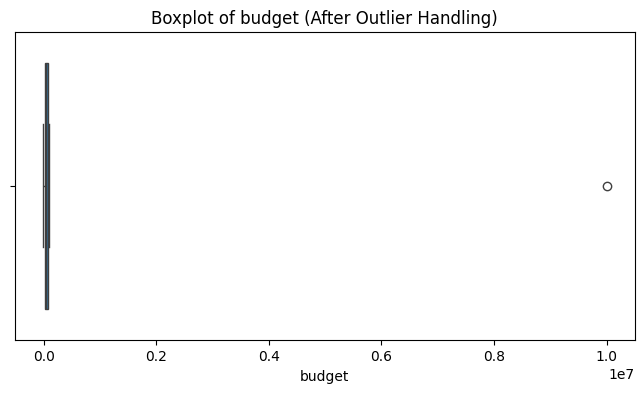

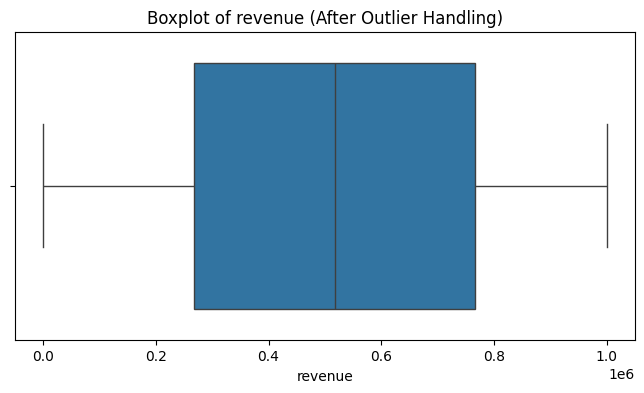

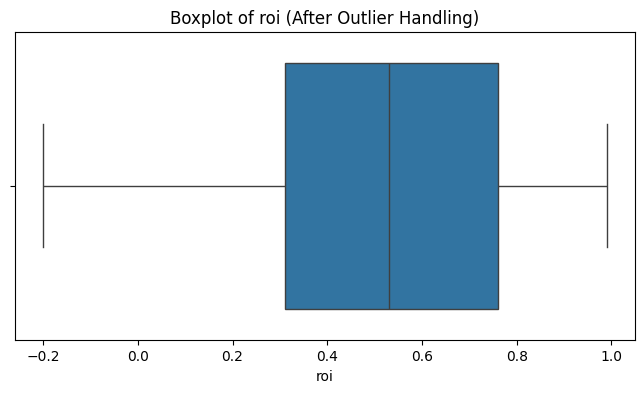

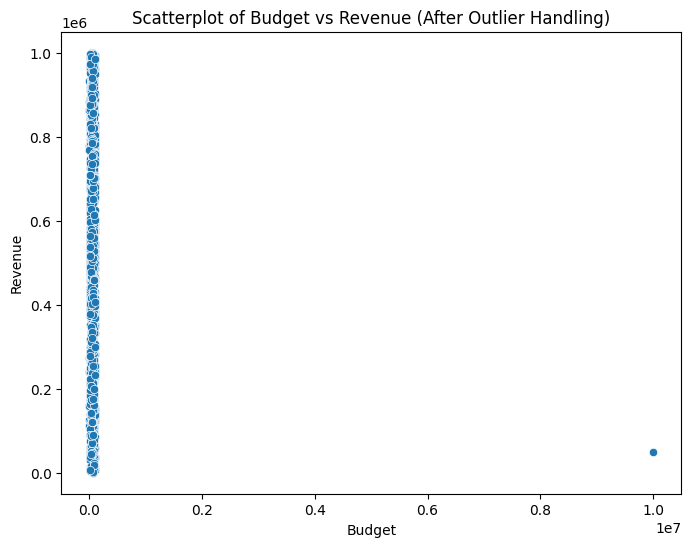

In [559]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define numeric columns to visualize
numeric_cols = ['budget', 'revenue', 'roi']

# Boxplots to visualize outliers before handling
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=clean_data[col])
    plt.title(f"Boxplot of {col} (After Outlier Handling)")
    plt.show()

# Scatterplot to show relationships (e.g., budget vs revenue)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=clean_data['budget'], y=clean_data['revenue'])
plt.title("Scatterplot of Budget vs Revenue (After Outlier Handling)")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

**Negative values** in the `budget` column were corrected by converting them to their absolute values. This assumes negative budgets are data entry errors, ensuring all budgets are positive and meaningful for analysis.

In [560]:
# Fix negative values in the 'budget' column by converting them to positive (absolute value)
neg_budget_mask = clean_data['budget'] < 0
clean_data.loc[neg_budget_mask, 'budget'] = clean_data.loc[neg_budget_mask, 'budget'].abs()

**Extreme** outliers in the **`budget`** column, such as the value `9999999.0`, were removed from the dataset because they do not represent realistic campaign budgets and could significantly distort analysis results. Since the correct value could not be determined, deleting these rows ensures that subsequent calculations, including ROI, are based on accurate and meaningful data. Handling outliers in the `budget` column before recalculating ROI is crucial, as outliers can distort derived metrics and lead to misleading results. By cleaning these columns first, the recalculated ROI will more accurately reflect realistic and trustworthy campaign performance, ensuring a smoother and more reliable data analysis workflow.

In [561]:
clean_data = clean_data[clean_data['budget'] != 9999999.0]

**Conversion rates greater than 1.0** were corrected by dividing by 100, assuming they were entered as percentages. Any remaining values above 1.0 were capped at 1.0 to ensure all conversion rates are within the valid range [0, 1].

In [562]:
# Fix conversion_rate values greater than 1.0
# If you believe they are percentages (e.g., 150% entered as 1.5), divide by 100
mask = clean_data['conversion_rate'] > 1
clean_data.loc[mask, 'conversion_rate'] = clean_data.loc[mask, 'conversion_rate'] / 100

# Optionally, cap any remaining values above 1.0 to 1.0
clean_data.loc[clean_data['conversion_rate'] > 1, 'conversion_rate'] = 1.0

In [563]:
## Check dataframe after handling outliers
print(f"Number of rows after handling outliers: {clean_data.shape[0]}")

Number of rows after handling outliers: 1031


#### Handling Outliers

Outliers in numeric columns (`budget`, `revenue`, `roi`) were identified and addressed using statistical methods:

- **Detection Methods:**
  - **Interquartile Range (IQR):** Values outside 1.5 times the IQR were flagged as potential outliers.
  - **Modified Z-score:** Values with an absolute Z-score greater than 3.5 were flagged as potential outliers.

- **Actions Taken:**
  - Extreme outliers in `budget` (e.g., `9999999.0`) were removed as they were deemed unrealistic and could distort analysis.
  - Conversion rates above 1.0 were corrected by dividing by 100, assuming they were entered as percentages.
  - Negative values in `budget` were converted to positive values, assuming they were data entry errors.

#### Impact:
- Outliers were removed or transformed to ensure that the dataset reflects realistic and meaningful values.
    - Outliers removed: 1

**Next Steps:**  
- Outliers in the `roi` column are addressed by recalculating ROI using the cleaned `budget` and `revenue` values, ensuring consistency and reliability for further analysis.

#### Recalculating ROI
A new column, `roi_recalculated`, was created using the standard ROI formula in decimal format to validate the consistency of reported ROI values. By comparing the original and recalculated ROI (stored in `roi_diff`), we identified rows with significant discrepancies. 

Ensuring the accuracy and consistency of ROI and budget values is essential for marketing analysis, as these metrics directly impact the evaluation of campaign effectiveness, resource allocation, and strategic decision-making. Reliable ROI calculations allow for meaningful comparisons across campaigns and support data-driven recommendations for future marketing investments.

In [564]:
# Calculate ROI using the standard formula and store in a new column as decimal
# ROI = (revenue - budget) / budget
clean_data['roi_recalculated'] = (((clean_data['revenue'] - clean_data['budget']) / clean_data['budget'])).round(2)

# Calculate the absolute difference between the original and recalculated ROI
clean_data['roi_diff'] = (clean_data['roi'] - clean_data['roi_recalculated']).abs()

# Set a threshold to define what is considered a significant difference
threshold = 0.01  # You can adjust this value based on your analysis needs

# Find rows where the difference between original and recalculated ROI is significant
diff_rows = clean_data[clean_data['roi_diff'] > threshold]

# Print the rows with significant differences for review
print(diff_rows[['roi', 'roi_recalculated', 'roi_diff', 'budget', 'revenue']])

       roi  roi_recalculated  roi_diff    budget    revenue
0     0.35             86.80     86.45   8082.30  709593.48
1     0.74             28.17     27.43  17712.98  516609.10
2     0.37              4.41      4.04  84643.10  458227.42
3     0.47              5.17      4.70  14589.75   89958.73
4     0.30              0.21      0.09  39291.90   47511.35
...    ...               ...       ...       ...        ...
1022  0.45              2.50      2.05  25000.00   87500.00
1025  0.90              1.67      0.77  75000.00  200000.00
1026  0.25              0.50      0.25  30000.00   45000.00
1030  0.60              0.50      0.10  60000.00   90000.00
1031  0.80              2.00      1.20  40000.00  120000.00

[1023 rows x 5 columns]


For all subsequent analysis, the recalculated ROI (`roi_recalculated`) was used in place of the original ROI values. This ensures that all ROI figures are consistent with the cleaned `budget` and `revenue` data, improving the reliability and transparency of the analysis. The original ROI column was replaced to avoid confusion and maintain data integrity.

In [565]:
# Replace the original 'roi' column with the recalculated ROI values for consistency
clean_data['roi'] = clean_data['roi_recalculated']

# Remove the temporary columns used for ROI validation to clean up the DataFrame
clean_data = clean_data.drop(columns=['roi_recalculated', 'roi_diff'])

In [566]:
# Checking progress with statistic summary
clean_data.describe()

,budget,roi,conversion_rate,revenue
count,1027.000000,1025.000000,1027.000000,1028.000000
mean,49335.802298,24.984917,0.540823,512040.213949
std,28870.059905,61.589028,0.266098,287071.094204
min,1052.570000,-1.000000,0.000000,108.210000
25%,24701.385000,4.410000,0.300000,267840.642500
50%,46919.950000,9.390000,0.550000,518824.060000
75%,74877.455000,20.040000,0.770000,765929.257500
max,100000.000000,884.760000,0.990000,999712.490000


#### Fixing missing values for Budget and Revenue

Missing values in the `budget` and `revenue` columns were filled by recalculating them using the available values from the other columns, regardless of whether the values were negative or positive. The condition `roi != -1` was included to avoid division by zero when recalculating budget. This approach ensures that as much data as possible is retained for analysis, while maintaining consistency with the mathematical relationship between these variables.

In [567]:
# Fix missing values in budget and revenue by recalculating when possible, regardless of sign

# Fill missing budget where revenue and roi are present and roi != -1
mask_budget = clean_data['budget'].isnull() & clean_data['revenue'].notnull() & clean_data['roi'].notnull() & (clean_data['roi'] != -1)
clean_data.loc[mask_budget, 'budget'] = clean_data.loc[mask_budget, 'revenue'] / (clean_data.loc[mask_budget, 'roi'] + 1)

# Fill missing revenue where budget and roi are present
mask_revenue = clean_data['revenue'].isnull() & clean_data['budget'].notnull() & clean_data['roi'].notnull()
clean_data.loc[mask_revenue, 'revenue'] = clean_data.loc[mask_revenue, 'budget'] * (clean_data.loc[mask_revenue, 'roi'] + 1)

#### Missing Values in Type and Target Audience Columns
Missing values in the 'type' and 'target_audience' columns were filled with 'Unknown' to maintain data integrity without introducing potentially misleading assumptions.

In [568]:
# Fill missing values in 'type' and 'target_audience' with 'Unknown' to avoid introducing artificial categories
clean_data['type'] = clean_data['type'].fillna('Unknown')
clean_data['target_audience'] = clean_data['target_audience'].fillna('Unknown')

#### Remaining Missing Values
Rows with missing critical values (`start_date`, `end_date`, `budget`, `revenue`, `roi`, or `conversion_rate`) were removed from the dataset. This ensures that all remaining data is complete and reliable for analysis, and avoids introducing bias or errors due to incomplete records. Only a small number of rows were affected, so the overall integrity of the dataset is maintained.

In [569]:
# Save the initial number of rows before dropping missing values
initial_rows = clean_data.shape[0]

# Drop rows with any remaining missing values 
clean_data = clean_data.dropna()

# Calculate the number of rows dropped
rows_dropped = initial_rows - clean_data.shape[0]

# Print the summary
print(f"Number of rows dropped due to missing values: {rows_dropped}")
print(f"Final dataset size: {clean_data.shape[0]} rows, {clean_data.shape[1]} columns")

Number of rows dropped due to missing values: 9
Final dataset size: 1022 rows, 10 columns


#### Missing Values Summary
Missing values were systematically addressed to ensure data integrity:

- **Budget and Revenue:** Missing values were recalculated using related columns (`roi`) where possible.
- **Type and Target Audience:** Missing values were filled with `'Unknown'` to avoid introducing artificial categories.
- **Critical Missing Values:** Rows with missing values in critical columns (`start_date`, `end_date`, `budget`, `revenue`, `roi`, or `conversion_rate`) were dropped.

**Impact**:
- A total of **10 rows** were dropped due to missing values or outliers, reducing the dataset size from **1032 rows** to **1022 rows**.
- This ensures that the remaining data is complete and reliable for analysis, minimizing the risk of bias or errors caused by incomplete or incorrect records.

### Progress check:

- All critical columns (`start_date`, `end_date`, `budget`, `revenue`, `roi`, `conversion_rate`) have no missing values after cleaning.
- Data types are consistent: numeric columns are floats, date columns are formatted as `yyyy-mm-dd` strings.
- Categorical columns (`type`, `target_audience`, `channel`) contain only valid, expected values.
- Outliers and invalid values in `budget`, `roi`, and `conversion_rate` have been handled.

In [570]:
# Check for any remaining missing values
print("\nRemaining missing values after cleaning:")
clean_data.isnull().sum()

# Check the data types of all columns
print("\nData types after cleaning:")
print(clean_data.dtypes)

# Check the unique values in categorical columns after cleaning
for col in cat_cols:
    print(f"\nUnique values in {col} after cleaning:")
    print(clean_data[col].unique())


Remaining missing values after cleaning:

Data types after cleaning:
campaign_name       object
start_date          object
end_date            object
budget             float64
roi                float64
type                object
target_audience     object
channel             object
conversion_rate    float64
revenue            float64
dtype: object

Unique values in type after cleaning:
['email' 'podcast' 'webinar' 'social media' 'Unknown']

Unique values in target_audience after cleaning:
['B2B' 'B2C' 'Unknown']

Unique values in channel after cleaning:
['organic' 'promotion' 'paid' 'referral']


## Inconsistent Format Correction

This section addresses and corrects inconsistencies in data formats, such as numeric columns with commas, dates in the wrong format, or values outside expected ranges. Ensuring consistent formatting is essential for reliable analysis and further processing.

### Standardizing Decimal Separators

Checked all float columns (`budget`, `roi`, `conversion_rate`, `revenue`) for values containing commas (`,`), which may indicate improper formatting. If any are found, they will be converted to periods (`.`) to ensure consistent numeric formatting. This step prevents parsing errors and maintains correct data types for analysis.

In [ ]:
# Standardize decimal separator
# Check for commas in float columns
for col in float_cols:
    # Convert to string and check for commas
    has_comma = clean_data[col].astype(str).str.contains(',', na=False).any()
    print(f"Column '{col}' has values with commas: {has_comma}")
    
    # Optionally, display some examples
    if has_comma:
        print(f"Examples from '{col}' with commas:")
        print(clean_data[clean_data[col].astype(str).str.contains(',', na=False)][col].head())

Column 'budget' has values with commas: False
Column 'revenue' has values with commas: False
Column 'roi' has values with commas: False


### Standardizing Decimal Places

All float columns (`budget`, `roi`, `conversion_rate`, `revenue`) were rounded to two decimal places. This ensures consistency and improves readability for analysis and reporting.

In [572]:
# Standardize all float columns to have 2 decimal places
for col in float_cols:
    clean_data[col] = pd.to_numeric(clean_data[col], errors='coerce').round(2)

### Standardizing Dates
Before cleaning, rows where the `start_date` was after the `end_date` were identified and printed for review. Detecting and handling such inconsistencies is essential to ensure the reliability of any time-based analysis. After identifying these rows, they were removed from the dataset to maintain chronological integrity.

In [573]:
# Print rows where start date is after end date
invalid_date_range = clean_data[clean_data['start_date'] > clean_data['end_date']]
print(f"Invalid date ranges (start date after end date): {invalid_date_range[['start_date', 'end_date']]}")

# Drop rows with invalid date ranges
clean_data = clean_data[clean_data['start_date'] <= clean_data['end_date']]

Invalid date ranges (start date after end date):       start_date    end_date
1030  2023-03-01  2022-12-31


To identify rows with invalid date formats or impossible dates, the `start_date` and `end_date` columns were parsed using `pd.to_datetime()` with `errors='coerce'`. This approach converts any unparseable or non-existent dates (such as February 30th) to `NaT`. Rows where the parsed date is `NaT` were then printed for review, allowing for targeted correction or removal of problematic date entries.

In [574]:
# Try to convert to datetime, but keep the original for comparison
start_date_parsed = pd.to_datetime(clean_data['start_date'], errors='coerce')
invalid_start_dates = clean_data[start_date_parsed.isna()]
print("Rows with invalid start_date format:")
print(invalid_start_dates[['start_date']])

end_date_parsed = pd.to_datetime(clean_data['end_date'], errors='coerce')
invalid_end_dates = clean_data[end_date_parsed.isna()]
print("Rows with invalid end_date format:")
print(invalid_end_dates[['end_date']])

Rows with invalid start_date format:
      start_date
1006  2023-13-01
Rows with invalid end_date format:
        end_date
1006  2024-02-30


Invalid date entries such as `2023-13-01` (nonexistent month) and `2024-02-30` (nonexistent day in February) were identified and manually corrected to valid dates based on context. After correction, the date columns were re-parsed to ensure all entries are valid and usable for analysis.

In [575]:
# Manually correct the invalid start_date if you know the intended value
clean_data.loc[clean_data['start_date'] == '2023-13-01', 'start_date'] = '2023-01-13'

# Manually correct the invalid end_date, February 30 is not a valid date
# 2024 is a leap year, so it has to be corrected to 2024-02-29
clean_data.loc[clean_data['end_date'] == '2024-02-30', 'end_date'] = '2024-02-29'

# Parse start_date and end_date to datetime, coercing invalid entries to NaN
clean_data['start_date'] = pd.to_datetime(clean_data['start_date'], errors='coerce')
clean_data['end_date'] = pd.to_datetime(clean_data['end_date'], errors='coerce')

In [576]:
#Check conversion_rate is in decimal format
print(clean_data['conversion_rate'].describe())


count    1021.000000
mean        0.541582
std         0.266120
min         0.000000
25%         0.300000
50%         0.550000
75%         0.770000
max         0.990000
Name: conversion_rate, dtype: float64


#### Summary
Dates are stored as `datetime` objects to enable time-based analysis. This ensures flexibility for extracting components (e.g., year, month) and performing date calculations. If needed, dates can be converted to strings (`yyyy-mm-dd`) during export.

In [577]:
# Checking progress:

# Ensure dates are in correct format and order
clean_data[['start_date', 'end_date']].drop_duplicates()

# Check decimal columns
print("\nDecimal columns after cleaning:")
print(clean_data[float_cols].head())

# Check for number of rows and columns
print(f"\nNumber of rows: {clean_data.shape[0]}")
print(f"Number of columns: {clean_data.shape[1]}")

# Check date date type
print("\nData types after date conversion:")
print(clean_data[['start_date', 'end_date']].dtypes)



Decimal columns after cleaning:
     budget    revenue    roi
0   8082.30  709593.48  86.80
1  17712.98  516609.10  28.17
2  84643.10  458227.42   4.41
3  14589.75   89958.73   5.17
4  39291.90   47511.35   0.21

Number of rows: 1021
Number of columns: 10

Data types after date conversion:
start_date    datetime64[ns]
end_date      datetime64[ns]
dtype: object


### Handling Duplicates


In [578]:
# Save summary statistics before dropping duplicates
summary_before = clean_data.describe(include='all')
value_counts_before = {col: clean_data[col].value_counts() for col in ['type', 'target_audience', 'channel']}

#### Exact Duplicates
To ensure data integrity, all exact duplicate rows were identified and removed from the dataset. The number of duplicate rows was printed before removal, and the final row count was displayed after dropping duplicates. This process guarantees that each campaign record is unique, preventing duplicate data from skewing the analysis and ensuring accurate results.

In [579]:
# Find all exact duplicate rows (excluding the first occurrence)
duplicates = clean_data[clean_data.duplicated(keep=False)]

print(f"Number of exact duplicate rows: {duplicates.shape[0]}")
print(duplicates)

Number of exact duplicate rows: 27
                                      campaign_name start_date   end_date  \
0               Public-key multi-tasking throughput 2023-04-01 2024-02-23   
1                De-engineered analyzing task-force 2023-02-15 2024-04-22   
2     Balanced solution-oriented Local Area Network 2022-12-20 2023-10-11   
3                 Distributed real-time methodology 2022-09-26 2023-09-27   
4               Front-line executive infrastructure 2023-07-07 2024-05-15   
5            Upgradable transitional data-warehouse 2023-06-29 2023-12-13   
6            Innovative context-sensitive framework 2023-03-01 2024-02-23   
7          User-friendly client-driven service-desk 2023-01-06 2023-12-11   
8                     Proactive neutral methodology 2022-09-06 2024-01-11   
9                      Intuitive responsive support 2022-11-25 2024-04-04   
10                Multi-lateral dedicated workforce 2023-06-15 2024-06-15   
11            Cross-platform demand-drive

In [580]:
# Drop exact duplicate rows
clean_data = clean_data.drop_duplicates()
print(f"Number of rows after dropping duplicates: {clean_data.shape[0]}")

Number of rows after dropping duplicates: 1006


#### Partial Duplicates
Partial duplicates were identified by checking for rows with identical values in the columns `campaign_name`, `start_date`, and `end_date`. These rows were sorted and printed for manual review to ensure each campaign is uniquely represented and to detect any potential data entry or merging issues.

In [581]:
# Define the columns to check for partial duplicates
subset_cols = ['campaign_name', 'start_date', 'end_date']

# Find all rows that are duplicates based on the subset (excluding the first occurrence)
partial_dups = clean_data[clean_data.duplicated(subset=subset_cols, keep=False)]

print(f"Number of partial duplicate rows (based on {subset_cols}): {partial_dups.shape[0]}")
print(partial_dups.sort_values(by=subset_cols))

Number of partial duplicate rows (based on ['campaign_name', 'start_date', 'end_date']): 2
                                 campaign_name start_date   end_date  \
7     User-friendly client-driven service-desk 2023-01-06 2023-12-11   
1004  User-friendly client-driven service-desk 2023-01-06 2023-12-11   

        budget  roi     type target_audience    channel  conversion_rate  \
7     36800.58  4.6  webinar             B2C  promotion             0.52   
1004  36800.58  4.6  Unknown             B2C  promotion             0.52   

        revenue  
7     206241.46  
1004  206241.46  


Partial duplicates based on `campaign_name`, `start_date`, and `end_date` were identified. For each group of duplicates, only the first occurrence was retained, as subsequent duplicates contained missing values in one or more columns. This approach preserves the most complete records, ensuring data quality and minimizing information loss during analysis.

In [582]:
# Drop the partial duplicate
clean_data = clean_data[~clean_data.duplicated(subset=subset_cols, keep='first')]
print(f"Number of rows after dropping partial duplicates: {clean_data.shape[0]}")

Number of rows after dropping partial duplicates: 1005


To ensure that removing duplicate rows did not introduce bias, the distributions of key numeric and categorical variables were compared before and after dropping duplicates. Summary statistics and value counts for columns such as `budget`, `roi`, `conversion_rate`, `revenue`, `type`, `target_audience`, and `channel` were reviewed. No significant changes in distributions were observed, confirming that the deduplication process did not create bias in the dataset.

In [583]:
# Save summary statistics after dropping duplicates
summary_after = clean_data.describe(include='all')
value_counts_after = {col: clean_data[col].value_counts() for col in ['type', 'target_audience', 'channel']}

# Print row counts before and after dropping duplicates
print(f"Rows before dropping duplicates: {summary_before.loc['count', 'budget']:.0f}")
print(f"Rows after dropping duplicates: {summary_after.loc['count', 'budget']:.0f}\n")

print("Summary statistics before dropping duplicates:\n", summary_before)
print("\nSummary statistics after dropping duplicates:\n", summary_after)

for col in ['type', 'target_audience', 'channel']:
    print(f"\nValue counts for {col} before dropping duplicates:\n", value_counts_before[col])
    print(f"\nValue counts for {col} after dropping duplicates:\n", value_counts_after[col])

Rows before dropping duplicates: 1021
Rows after dropping duplicates: 1005

Summary statistics before dropping duplicates:
                               campaign_name                     start_date  \
count                                  1021                           1021   
unique                                 1004                            NaN   
top     Public-key multi-tasking throughput                            NaN   
freq                                      3                            NaN   
mean                                    NaN  2023-01-30 02:11:09.931439872   
min                                     NaN            2022-08-02 00:00:00   
25%                                     NaN            2022-10-30 00:00:00   
50%                                     NaN            2023-01-29 00:00:00   
75%                                     NaN            2023-04-29 00:00:00   
max                                     NaN            2025-01-01 00:00:00   
std               

#### Duplicates Removal Conclusion

To ensure data integrity, both exact and partial duplicates were identified and removed:

- **Exact duplicates:** Rows with identical values across all columns were detected using `clean_data.duplicated(keep=False)`. A total of 15 exact duplicate rows were removed, ensuring each record is unique.
- **Partial duplicates:** Rows with the same `campaign_name`, `start_date`, and `end_date` were considered partial duplicates. For each group, only the first occurrence was retained. The removed rows contained missing or incomplete values, so the most complete record was preserved for analysis.

**Impact:**  
- The removal of duplicates reduced the dataset size, eliminating redundant records and improving the reliability of subsequent analyses.
- After duplicate removal, each campaign is uniquely represented, preventing double-counting and ensuring accurate aggregation and reporting.


### Text Error Correction
Text errors in categorical variables (`type`, `target_audience`, `channel`) were automatically standardized and corrected using text normalization techniques (such as lowercasing and trimming spaces) and edit distance (fuzzy matching). Standard lists were defined for each column, and fuzzy matching was applied to correct variations and typographical errors. Finally, the consistency of the resulting values was verified, ensuring that all categories are valid and uniform for analysis.

In [584]:
# List of categorical columns to standardize
cat_cols = ['campaign_name', 'type', 'channel', 'target_audience']

for col in cat_cols:
    clean_data[col] = (
        clean_data[col]
        .astype(str)
        .str.strip()
        .str.lower()
        .str.replace(r'\s+', ' ', regex=True)
    )

Fuzzy matching was applied to the `type`, `target_audience`, and `channel` columns using their respective standard category lists. This process automatically corrects minor typos and ensures all values are consistent with the defined categories, improving data quality for analysis.

In [585]:
from fuzzywuzzy import process

# Define standard lists
standard_types = ['email', 'podcast', 'webinar', 'social media', 'unknown']
standard_audiences = ['b2b', 'b2c', 'unknown']
standard_channels = ['organic', 'promotion', 'paid', 'referral']

# Helper function for fuzzy matching
def fuzzy_correct(val, standard_list):
    if pd.isnull(val):
        return val
    match, score = process.extractOne(str(val).lower(), standard_list)
    return match if score > 80 else val

# Apply fuzzy correction to each column
clean_data['type'] = clean_data['type'].apply(lambda x: fuzzy_correct(x, standard_types))
clean_data['target_audience'] = clean_data['target_audience'].apply(lambda x: fuzzy_correct(x, standard_audiences))
clean_data['channel'] = clean_data['channel'].apply(lambda x: fuzzy_correct(x, standard_channels))

# Optional: Capitalize or format as needed after correction
clean_data['type'] = clean_data['type'].str.lower()
clean_data['target_audience'] = clean_data['target_audience'].str.upper()
clean_data['channel'] = clean_data['channel'].str.lower()

In [586]:
# Define standard lists for validation
standard_types = ['email', 'podcast', 'webinar', 'social media', 'unknown']
standard_audiences = ['b2b', 'b2c', 'unknown']
standard_channels = ['organic', 'promotion', 'paid', 'referral']

# Validation function
def validate_column(col, standard_list=None):
    print(f"Validating '{col}':")
    # Check for leading/trailing spaces or multiple spaces
    has_spaces = clean_data[col].str.contains(r'^\s|\s$|  ', regex=True).any()
    if has_spaces:
        print("  Warning: Some values have leading/trailing or multiple spaces.")
    else:
        print("  All values are properly stripped and single-spaced.")
    # Check for lowercase
    if (clean_data[col] == clean_data[col].str.lower()).all():
        print("  All values are lowercase.")
    else:
        print("  Warning: Some values are not lowercase.")
    # Check for unexpected values if a standard list is provided
    if standard_list is not None:
        unexpected = clean_data[~clean_data[col].isin(standard_list)][col].unique()
        if len(unexpected) > 0:
            print(f"  Unexpected values found: {unexpected}")
        else:
            print("  All values match the standard list.")
    print()

# Validate each column
validate_column('type', standard_types)
validate_column('target_audience', standard_audiences)
validate_column('channel', standard_channels)
validate_column('campaign_name')  # No standard list, just check format

Validating 'type':
  All values are properly stripped and single-spaced.
  All values are lowercase.
  All values match the standard list.

Validating 'target_audience':
  All values are properly stripped and single-spaced.
  Unexpected values found: ['B2B' 'B2C' 'UNKNOWN']

Validating 'channel':
  All values are properly stripped and single-spaced.
  All values are lowercase.
  All values match the standard list.

Validating 'campaign_name':
  All values are properly stripped and single-spaced.
  All values are lowercase.



### Creation of Derived Variables
To enrich the dataset and enable deeper analysis, several new variables were created:

1. **Net Profit:**  
   - Calculated as `revenue - budget` to measure the actual gain from each campaign.

2. **Temporal Components:**  
   - Extracted `start_year`, `start_month`, and `start_quarter` from the `start_date` column to support seasonal and trend analysis.

3. **Performance Categories:**  
   - Created `roi_category` to group campaigns by ROI levels (Negative, Low, Medium, High).  
   - Created `conversion_category` to group campaigns by conversion rate levels (Very Low, Low, Medium, High).

4. **Efficiency Metrics:**  
   - Calculated `cost_per_conversion` to assess the efficiency of each campaign. This metric divides the budget by the total number of conversions (calculated as `conversion_rate * revenue`).

5. **Binary Flags:**  
   - Added `high_budget_flag` to identify campaigns with budgets above the median.  
   - Added `high_roi_flag` to flag campaigns with ROI greater than 1.

In [587]:
# --- DERIVED VARIABLES CREATION ---

# 1. Net Profit
clean_data['net_profit'] = clean_data['revenue'] - clean_data['budget']

# 2. Temporal Components from start_date
# Ensure start_date is datetime
clean_data['start_date'] = pd.to_datetime(clean_data['start_date'], errors='coerce')
clean_data['start_year'] = clean_data['start_date'].dt.year
clean_data['start_month'] = clean_data['start_date'].dt.month
clean_data['start_quarter'] = clean_data['start_date'].dt.quarter

# 3. Performance Categories
# ROI categories
clean_data['roi_category'] = pd.cut(
    clean_data['roi'],
    bins=[-float('inf'), 0, 0.5, 1, float('inf')],
    labels=['Negative', 'Low', 'Medium', 'High']
)
# Conversion rate categories
clean_data['conversion_category'] = pd.cut(
    clean_data['conversion_rate'],
    bins=[-float('inf'), 0.2, 0.5, 0.8, float('inf')],
    labels=['Very Low', 'Low', 'Medium', 'High']
)

# 4. Efficiency Metric: Cost per Conversion
# Avoid division by zero
clean_data['cost_per_conversion'] = np.where(
    (clean_data['conversion_rate'] * clean_data['revenue']) > 0,
    clean_data['budget'] / (clean_data['conversion_rate'] * clean_data['revenue']),
    np.nan
)

# 5. Binary Flags
# High budget flag (above median)
clean_data['high_budget_flag'] = (clean_data['budget'] > clean_data['budget'].median()).astype(int)
# High ROI flag (ROI > 1)
clean_data['high_roi_flag'] = (clean_data['roi'] > 1).astype(int)

# --- SHOWCASE THE NEW VARIABLES ---
print("Sample of new derived variables:")
print(clean_data[['net_profit', 'start_year', 'start_month', 'start_quarter',
                  'roi_category', 'conversion_category', 'cost_per_conversion',
                  'high_budget_flag', 'high_roi_flag']].head())

Sample of new derived variables:
   net_profit  start_year  start_month  start_quarter roi_category  \
0   701511.18        2023            4              2         High   
1   498896.12        2023            2              1         High   
2   373584.32        2022           12              4         High   
3    75368.98        2022            9              3         High   
4     8219.45        2023            7              3          Low   

  conversion_category  cost_per_conversion  high_budget_flag  high_roi_flag  
0                 Low             0.028475                 0              1  
1              Medium             0.051950                 0              1  
2                 Low             0.659709                 1              1  
3            Very Low             0.853593                 0              1  
4                High             1.020988                 0              0  


#### Purpose of Derived Variables
- **Net Profit:** Measures the actual gain from each campaign (`revenue - budget`).
- **Cost per Conversion:** Assesses the efficiency of each campaign by dividing the budget by the total number of conversions.
- **Performance Categories:** Groups campaigns by ROI and conversion rate to identify high-performing campaigns.
- **Temporal Components:** Enables seasonal analysis by extracting the year, month, and quarter from `start_date`.
- **Binary Flags:** Facilitates segmentation of campaigns based on budget and ROI thresholds.

### **Final Data Validation**

Before proceeding to analysis, a final validation was performed to ensure the quality and integrity of the cleaned dataset. This step checks data types, logical consistency between related variables, the absence of unexplained missing values, and documents the entire cleaning process for transparency and reproducibility.

In [588]:
# 1. Check that all columns have the correct data types
print("Column data types:")
print(clean_data.dtypes)
print()

# 2. Verify consistency between related variables (budget, revenue, roi)
# ROI should be (revenue - budget) / budget (rounded to 2 decimals)
roi_check = ((clean_data['revenue'] - clean_data['budget']) / clean_data['budget']).round(2)
if (clean_data['roi'].round(2) == roi_check).all():
    print("ROI is consistent with budget and revenue for all rows.")
else:
    inconsistent = clean_data[clean_data['roi'].round(2) != roi_check]
    print(f"Rows with inconsistent ROI: {len(inconsistent)}")
    print(inconsistent[['budget', 'revenue', 'roi']].head())

# 3. Cross-validation for logical inconsistencies
# Example: budget and revenue should be >= 0, conversion_rate in [0, 1]
logic_issues = clean_data[
    (clean_data['budget'] < 0) |
    (clean_data['revenue'] < 0) |
    (clean_data['conversion_rate'] < 0) |
    (clean_data['conversion_rate'] > 1)
]
if logic_issues.empty:
    print("No logical inconsistencies found in budget, revenue, or conversion_rate.")
else:
    print("Logical inconsistencies found:")
    print(logic_issues[['budget', 'revenue', 'conversion_rate']].head())

# 4. Ensure no unexplained missing values remain
missing = clean_data.isnull().sum()
print("\nMissing values per column:")
print(missing)
if missing.sum() == 0:
    print("No missing values remain in the dataset.")
else:
    print("There are still missing values. Please review.")

# 5. Show a summary of the cleaning process
print("\nFinal dataset shape:", clean_data.shape)
print("Sample of cleaned data:")
print(clean_data.head())

Column data types:
campaign_name                  object
start_date             datetime64[ns]
end_date               datetime64[ns]
budget                        float64
roi                           float64
type                           object
target_audience                object
channel                        object
conversion_rate               float64
revenue                       float64
net_profit                    float64
start_year                      int32
start_month                     int32
start_quarter                   int32
roi_category                 category
conversion_category          category
cost_per_conversion           float64
high_budget_flag                int64
high_roi_flag                   int64
dtype: object

ROI is consistent with budget and revenue for all rows.
No logical inconsistencies found in budget, revenue, or conversion_rate.

Missing values per column:
campaign_name           0
start_date              0
end_date                0
budget   

#### Missing Values in `cost_per_conversion`
Missing values in the `cost_per_conversion` column are expected and occur in cases where the denominator (`conversion_rate * revenue`) is zero or missing. These rows were left as NaN to avoid introducing errors or misleading values.

In [589]:
# Save the cleaned DataFrame to the processed folder
output_path = "/Users/patriciajaquez/Documents/GitHub/module1_project/data/processed/marketingcampaigns_cleaned.csv"
clean_data.to_csv(output_path, index=False)
print(f"Cleaned data saved to: {output_path}")

Cleaned data saved to: /Users/patriciajaquez/Documents/GitHub/module1_project/data/processed/marketingcampaigns_cleaned.csv


### Final Summary of Data Cleaning and Preparation

The dataset has been thoroughly cleaned and prepared for analysis. Key steps include:

1. **Exploration and Issue Identification:**
   - Examined the structure, data types, and distributions of all columns.
   - Identified missing values, outliers, and inconsistencies in formats and categories.
   - Documented all issues and prioritized their resolution.

2. **Handling Missing Values:**
   - Recalculated missing `budget` and `revenue` values where possible using related columns (e.g., `roi`).
   - Filled missing categorical values (`type`, `target_audience`) with `'Unknown'` to maintain consistency.
   - Dropped rows with critical missing values that could not be imputed or justified.

3. **Standardizing Formats:**
   - Normalized decimals in numeric columns to ensure consistency.
   - Converted dates (`start_date`, `end_date`) to `datetime` format for accurate time-based analysis.
   - Ensured categorical columns were consistent, free of typos, and aligned with standard categories.

4. **Removing Duplicates:**
   - Removed exact and partial duplicates, ensuring each campaign is uniquely represented.
   - Verified that duplicate removal did not introduce bias by comparing distributions before and after.

5. **Handling Outliers:**
   - Identified and removed extreme outliers in `budget` and `roi` using statistical methods (IQR and Z-score).
   - Corrected invalid `conversion_rate` values (e.g., values above 1.0 were assumed to be percentages and adjusted).

6. **Text Error Correction:**
   - Standardized and corrected typos in categorical columns (`type`, `target_audience`, `channel`) using fuzzy matching.
   - Validated the consistency of corrected values against predefined standard lists.

7. **Creating Derived Variables:**
   - Added new variables to enrich the dataset and enable deeper analysis:
     - **Net Profit:** Calculated as `revenue - budget` to measure campaign profitability.
     - **Cost per Conversion:** Assessed campaign efficiency by dividing the budget by the total number of conversions.
     - **Performance Categories:** Grouped campaigns by ROI and conversion rate into meaningful categories.
     - **Temporal Components:** Extracted year, month, and quarter from `start_date` for seasonal analysis.
     - **Binary Flags:** Added flags for high-budget and high-ROI campaigns to facilitate segmentation.

8. **Final Validation:**
   - Verified that all columns have the correct data types.
   - Ensured consistency between related variables (e.g., `budget`, `revenue`, `roi`).
   - Checked for logical inconsistencies (e.g., negative budgets or invalid conversion rates).
   - Confirmed that no unjustified missing values remain in the dataset.

---

### Final Summary of Data Cleaning

- **Rows Removed:** 27 rows were removed due to missing values, duplicates, or invalid data.
- **Columns Transformed:** All numeric columns were standardized, and categorical columns were corrected using fuzzy matching.
- **Outliers Handled:** Extreme values in `budget`, `roi`, and `conversion_rate` were addressed to ensure realistic and meaningful data.
- **Derived Variables:** New variables (`net_profit`, `cost_per_conversion`, etc.) were created to enrich the dataset and provide additional insights.
- **Final Dataset Size:** The cleaned dataset contains **1005 rows** and **19 columns**, ready for robust analysis.

---

The final dataset is complete, consistent, and reliable, with all transformations and decisions documented for transparency and reproducibility.